<a href="https://colab.research.google.com/github/UiinKim/UiinKim/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


*   기존 코딩 -> data를 넣으면 해답을 찾는다.
*   머신 러닝 -> data와 해답을 넣고 규칙성을 찾는다.(traing, learning)





*   머신러닝에서는 독립변수 x와 종속변수 y의 관계를 유추하기 위해 수학적으로 식을 세우는 것을 가설(H : Hypothesis)라고 한다.ex) H(x) = wx+b, H(x)=w1x1+w2x2+...+wnxn+b, y는 실제값, H(x)는 가설에 대한 값
*   실제값과 예측값에 대한 오차에 대한 식을 목적함수 or 비용함수 or 손실함수라고 한다.


*   평균제곱오차(MSE : Mean Squared Error) : 모든 점과 직선사이의 거리를 모두 제곱하여 더하고 n으로 나누어 오차의 제곱합에 대한 평균.








*   옵티마이저 알고리즘(=최적화 알고리즘) : 비용 함수를 최소화화는 매개변수 w(가중치), b를 찾기 위한 작업에 사용됨. 대표적으로 경사하강법이 있음.
*   w는 가중치이며 직선의 방정식에서는 기울기이다. 직선의 기울기가 지나치게 높거나 낮을 때 오차가 커진다. b(y절편)도 마찬가지.


*   cost가 최소가 되는 지점은 2차방정식 이상일 경우 곡선이며, 접선의 기울기가 0이 되어야하고, 미분값도 0이 되는 지점이다.

*   결국 최소화w를 구하기 위해서 비용함수(cost(w,b))를 미분하여 현재 w의 접선의 기울기를 구한 후에 접선의 기울기가 낮은 방향으로 w를 다시 미분하고 이 과정을 접선의 기울기가 0인 곳을 향해 w의 값을 변경하는 작업을 반복한다. --> 경사하강법

*   학습률 a(알파)는 접선의 기울기 w-a를 구하는데에 사용하며 w:=w-a(@/@w)cost(w)로 접선의 기울기가 0인 방향으로 조정할 수 있다. (@는 세타)

*   학습률 a(알파)는 지나치게 높을 경우 cost가 발산을 하며 지나치게 낮을 경우 학습 속도가 너무 느려져 적당한 값을 찾아야 한다.




1. 자동미분과 선형회귀 실습

In [3]:
#자동미분
import tensorflow as tf

w=tf.Variable(2.) #tf.Variable을 사용하여 메모리에 저장한 후 사용한다. 업데이트가 가능하며 함수를 만들었을 때 고정이 가능

def f(w): #f(w) 함수 정의
  y=w**2
  z=2*y+5 #2(w**2)+5라는 이차방정식을 세운다.
  return z

In [4]:
with tf.GradientTape() as tape:
  z=f(w)
gradients=tape.gradient(z,[w]) #자동미분
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [5]:
#자동미분을 이용한 선형 회귀 구현

#학습될 가중치 변수를 선언
w=tf.Variable(4.0)
b=tf.Variable(1.0)

In [6]:
@tf.function #그래프의 생성과 실험을 분리하여 속도를 높이기 위해 사용
def hypothesis(x): #가설을 함수로 정의
  return w*x+b

In [7]:
x_test=[3.5, 5, 5.5, 6] #임의로 계싼
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [13]:
@tf.function
def mse_loss(y_pred, y): #손실함수
  #예측값과 실제값의 차이값을 제곱하여 평균을 취한다.
  return tf.reduce_mean(tf.square(y_pred-y))

In [14]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [15]:
optimizer=tf.optimizers.SGD(0.01) #옵티마이저(최소비용을 찾기 위한 알고리즘)은 경사하강법을 사용(SGD)하고 학습률은 0.01을 사용한다.

In [19]:
for i in range(301):
  with tf.GradientTape() as tape:
    #현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
    y_pred=hypothesis(x)

    #평균 제곱 오차를 계산
    cost=mse_loss(y_pred, y)

  #손실함수에 대한 파라미터의 미분값 계산
  gradients=tape.gradient(cost, [w,b]) #손실함수와 w,b로 미분

  #파라미터 업데이트
  optimizer.apply_gradients(zip(gradients, [w,b]))

  if i%10==0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))



epoch :   0 | w의 값 : 10.3935 | b의 값 : 1.996 | cost : 3.978573
epoch :  10 | w의 값 : 10.4995 | b의 값 : 1.963 | cost : 1.344076
epoch :  20 | w의 값 : 10.5069 | b의 값 : 1.916 | cost : 1.321618
epoch :  30 | w의 값 : 10.5140 | b의 값 : 1.871 | cost : 1.300939
epoch :  40 | w의 값 : 10.5208 | b의 값 : 1.828 | cost : 1.281886
epoch :  50 | w의 값 : 10.5274 | b의 값 : 1.787 | cost : 1.264346
epoch :  60 | w의 값 : 10.5337 | b의 값 : 1.747 | cost : 1.248186
epoch :  70 | w의 값 : 10.5397 | b의 값 : 1.709 | cost : 1.233308
epoch :  80 | w의 값 : 10.5455 | b의 값 : 1.673 | cost : 1.219602
epoch :  90 | w의 값 : 10.5510 | b의 값 : 1.638 | cost : 1.206981
epoch : 100 | w의 값 : 10.5564 | b의 값 : 1.604 | cost : 1.195359
epoch : 110 | w의 값 : 10.5615 | b의 값 : 1.572 | cost : 1.184651
epoch : 120 | w의 값 : 10.5664 | b의 값 : 1.541 | cost : 1.174790
epoch : 130 | w의 값 : 10.5711 | b의 값 : 1.512 | cost : 1.165712
epoch : 140 | w의 값 : 10.5756 | b의 값 : 1.483 | cost : 1.157345
epoch : 150 | w의 값 : 10.5800 | b의 값 : 1.456 | cost : 1.149646
epoch : 

In [20]:
#계속해서 업데이트되며 갈수록 코스트가 낮아진다.

#학습된 w와 b의 값에 대해 임의 입력을 넣었을 경우의 예측값 확인
x_test=[3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.352856 54.294247 59.608044 64.921844]


In [27]:
#keras로 선형 회귀 구현
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model=Sequential()#순차적 구조를 가진 모델 생성 기능

#출력 y의 차원(output_dim)은 1. 입력 x의 차원(input_dim)은 1
#선형 회귀이므로 activation은 linear
model.add(Dense(1, input_dim=1, activation='linear')) #Dense는 다른 레이어와 결합하여 딥러닝 모델을 구성할 때 사용.
#입력 벡터와 가중치 행렬의 곱셈에 편향을 더하여 activation으로 거친 출력값을 계산 -> (1개의 bias(wx+b의 b)+input_dims)*output_dim -> 2개의 파라미터

#sgd는 경사 하강법, 학습률은 (learning rate, lr)은 0.01
sgd=optimizers.SGD(lr=0.01)

#손실함수(Loss function)은 평균제곱오차(mse)를 사용한다.
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])#compile은 모델을 학습하는 메소드. optimizer은 경사하강법(sgd)를 선택하고 손실함수로는 mse(평균제곱오차), 모델과 함께 평가하려는 행렬을 ['mse']로 지정한다.

#주어진 x와 y데이터에 대해서 오차를 최소화하는 작업을 300번 시도합니다.
model.fit(x, y, epochs=300) #fit은 주어진 epochs만큼 모델을 학습시키는 메소드이다.


Epoch 1/300
1/1 [==============================] - 1s 833ms/step - loss: 4120.5430 - mse: 4120.5430
Epoch 2/300
1/1 [==============================] - 0s 12ms/step - loss: 508.1008 - mse: 508.1008
Epoch 3/300
1/1 [==============================] - 0s 12ms/step - loss: 63.6156 - mse: 63.6156
Epoch 4/300
1/1 [==============================] - 0s 12ms/step - loss: 8.9236 - mse: 8.9236
Epoch 5/300
1/1 [==============================] - 0s 13ms/step - loss: 2.1928 - mse: 2.1928
Epoch 6/300
1/1 [==============================] - 0s 17ms/step - loss: 1.3633 - mse: 1.3633
Epoch 7/300
1/1 [==============================] - 0s 12ms/step - loss: 1.2598 - mse: 1.2598
Epoch 8/300
1/1 [==============================] - 0s 14ms/step - loss: 1.2458 - mse: 1.2458
Epoch 9/300
1/1 [==============================] - 0s 20ms/step - loss: 1.2427 - mse: 1.2427
Epoch 10/300
1/1 [==============================] - 0s 11ms/step - loss: 1.2411 - mse: 1.2411
Epoch 11/300
1/1 [==============================] - 0s 1

1/1 [==============================] - 0s 100ms/step


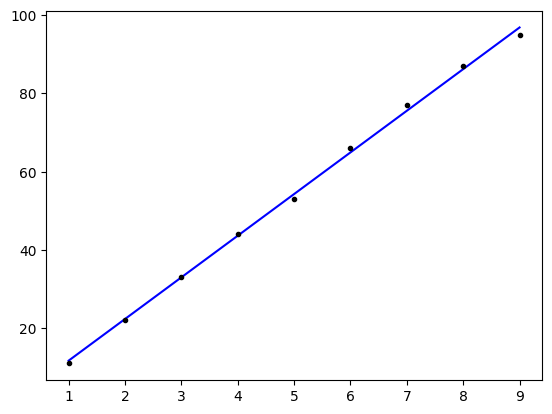

In [28]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [29]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 70ms/step
[[102.15447]]


2. 로지스틱 회귀 -> 이진분류

*   시그모이드 함수(Sigmoid function) : 출력이 0과 1 사이의 값을 가지면서 S자 형태로 그려지는 함수 -> 0과 1 사이의 값을 확률로 해석한다.




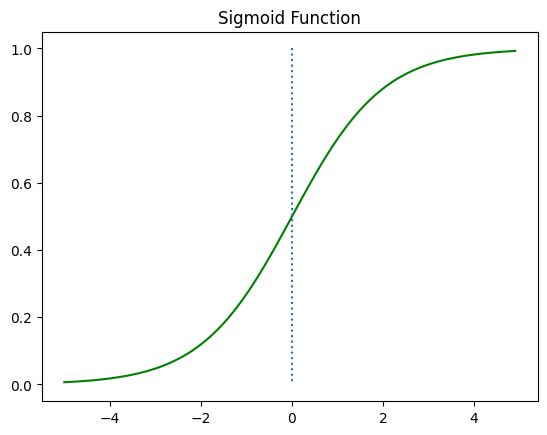

In [32]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
  return 1/(1+np.exp(-x)) #np.exp(x)는 e^x를 의미한다. 해당 리턴 값은 기댓값 H(x)=sigmoid(x)=o(x)로 표현됨.

x=np.arange(-5.0, 5.0, 0.1)
y=sigmoid(x)

plt.plot(x, y, 'g')
plt.plot([0,0],[1.0,0.0], ':') #가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
#이 그래프는 -5.0부터 5.0까지 0.1씩 증가하는 그래프를 보여준다.

<function matplotlib.pyplot.show(close=None, block=None)>

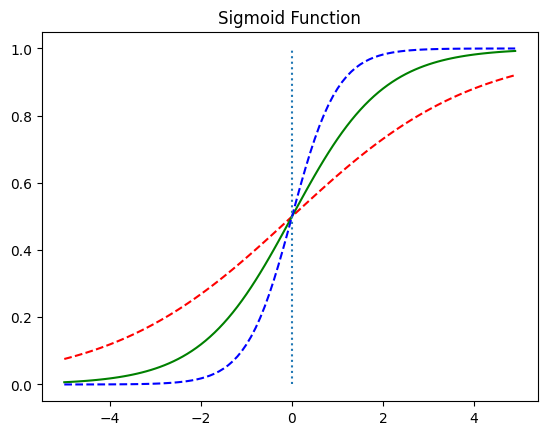

In [34]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

x=np.arange(-5.0, 5.0, 0.1)
y1=sigmoid(x*0.5)
y2=sigmoid(x)
y3=sigmoid(2*x)

plt.plot(x, y1, 'r', linestyle='--') #0.5x 일때
plt.plot(x, y2, 'g')# x일때
plt.plot(x, y3, 'b', linestyle='--') #2x일때
plt.plot([0,0], [0.0,1.0], ':') #가운데 점선
plt.title('Sigmoid Function')
plt.show
#x에 곱한 수가 w이며, w(가중치)의 값이 커질수록 경사가 커지고 w의 값이 작아질수록 경사가 작아진다.

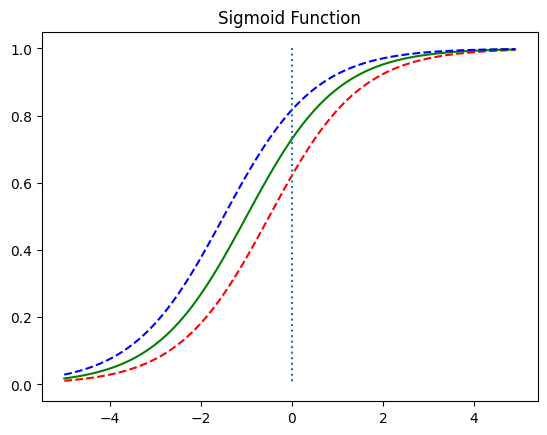

In [35]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x+0.5)
y2 = sigmoid(x+1)
y3 = sigmoid(x+1.5)

plt.plot(x, y1, 'r', linestyle='--') # x + 0.5
plt.plot(x, y2, 'g') # x + 1
plt.plot(x, y3, 'b', linestyle='--') # x + 1.5
plt.plot([0,0],[1.0,0.0], ':') # 가운데 점선 추가
plt.title('Sigmoid Function')
plt.show()
#b의 값에 따라서 그래프가 이동을 하였는데, 0.5 이상이면 1, 이하이면 0으로 만들어 이진 문제를 분류할 수 있다.



*   비용함수 : 로지스틱 회귀도 경사하강법을 사용하여 w를 찾지만, 비용함수로 평균제곱오차를 사용하지는 않는다. -> 글로벌 미니멈(전체 함수에 걸쳐 최솟값)이 아닌 로컬 미니멈(특정 구역에서의 최솟값)에 빠질 가능성이 높기 때문

*   로지스틱 회귀에서는 가중치를 최소화하는 목적함수 J(w)를 찾아야한다.


*   if y=1(실제값) -> cost(H(x), y) = -log(H(x))
*   실제값이 1일때 y의 값이 0에 가까워질수록 오차가 커진다. -> H(x)가 1이 되면 cost가 0이 된다. 0이면 cost가 발산
*   if y=0(실제값) -> cost(H(x), y) = -log(1-H(x))
*   실제값이 0일때 y의 값이 1에 가까워질수록 오차가 커진다. -> H(x)가 0이 되면 cost가 0이 된다. 1이면 cost가 발산


*   항목 추가





